Resources:
- https://data.census.gov/
- https://carto.com/blog/zip-codes-spatial-analysis
- https://www.reddit.com/r/RealEstateTechnology/comments/maqqry/what_is_currently_the_best_way_to_get_mls_data_as/
- https://www.reddit.com/r/datasets/comments/hixfeo/how_to_obtain_median_income_data_for_zip_codes/
- https://simplemaps.com/data/us-zips
- https://www2.census.gov/geo/pdfs/reference/geodiagram.pdf?#



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read Data and Clean

In [33]:
# Load income data
income = pd.read_excel('census.xlsx', sheet_name='income', index_col=None)
#keep rows where 'Label (Grouping)' contains Households!!Estimate
income = income[income['Label (Grouping)'].str.contains('Households!!Estimate')]
# parse zip code from column 'Label (Grouping)'
income['zipcode'] = income['Label (Grouping)'].str.extract(r'(\d{5})')
# rename column 'Median income (dollars)' to 'median_income'
income.rename(columns={'Median income (dollars)': 'median_income'}, inplace=True)
# keep columns 'zipcode' and 'median_income'
income = income[['zipcode', 'median_income']]
# change median_income to numeric
income['median_income'] = pd.to_numeric(income['median_income'], errors='coerce')
income.head()

,zipcode,median_income
0,89010,46250.0
8,89019,47177.0
16,89060,38891.0
24,89061,54710.0
32,89439,57879.0


In [3]:
# # Load home price of single family homes
# value = pd.read_excel('census.xlsx', sheet_name='single_family_homes', index_col=None)
# # remove rows where 'Zip Code' is 'Zip Code'
# value = value[value['Zip Code'] != 'Zip Code']
# # rename column '2024*' to 'value'
# value.rename(columns={'2024*': 'value', 'Zip Code': 'zipcode'}, inplace=True)
# # keep columns 'Zip Code' and 'value'
# value = value[['zipcode', 'value']]
# value.head()

In [15]:
# load population data from census
population = pd.read_excel('census.xlsx', sheet_name='population_housing', header=1, index_col=None)
# parse zipcode from column 'Geographic Area Name'
population['zipcode'] = population['Geographic Area Name'].str.extract(r'(\d{5})')
# keep columns 
population = population[['zipcode',
                        'Count!!SEX AND AGE!!Total population', 
                        'Count!!HOUSEHOLDS BY TYPE!!Total households', 
                        'Count!!HOUSING OCCUPANCY!!Total housing units', 
                        'Count!!VACANCY RATES!!Homeowner vacancy rate (percent) [4]',
                        'Count!!VACANCY RATES!!Rental vacancy rate (percent) [5]',
                        'Count!!HOUSING TENURE!!Occupied housing units']]
# rename columns
population.columns = ['zipcode', 'population', 'households', 'housing_units', 'homeowner_vacancy_rate', 'rental_vacancy_rate', 'occupied_housing_units']
population.head()

,zipcode,population,households,housing_units,homeowner_vacancy_rate,rental_vacancy_rate,occupied_housing_units
0,89010,333,146,198,0.0,2.1,146
1,89019,2501,1161,1766,3.0,43.4,1161
2,89060,11857,4761,5553,2.9,12.9,4761
3,89061,7891,3429,4107,7.4,7.2,3429
4,89439,2154,925,1051,2.3,28.9,925


In [27]:
# load housing data from census
housing = pd.read_excel('census.xlsx', sheet_name='housing', header=1, index_col=None)
# parse zipcode from column 'Geographic Area Name'
housing['zipcode'] = housing['Geographic Area Name'].str.extract(r'(\d{5})')
# keep columns
housing = housing[['zipcode',
                    'Estimate!!ROOMS!!Total housing units!!Median rooms',
                    'Estimate!!GROSS RENT!!Occupied units paying rent!!Median (dollars)',
                    'Estimate!!VALUE!!Owner-occupied units!!Median (dollars)']]
# rename columns
housing.columns = ['zipcode', 'median_rooms', 'median_rent', 'median_value']
# change data type to numeric
housing['median_rooms'] = pd.to_numeric(housing['median_rooms'], errors='coerce')
housing['median_rent'] = pd.to_numeric(housing['median_rent'], errors='coerce')
housing['median_value'] = pd.to_numeric(housing['median_value'], errors='coerce')
housing.head()

,zipcode,median_rooms,median_rent,median_value
0,89010,4.2,565.0,113800.0
1,89019,4.4,769.0,249400.0
2,89060,5.5,902.0,208800.0
3,89061,5.5,1470.0,286400.0
4,89439,5.7,1106.0,681300.0


In [20]:
# load lat long data
latlong = pd.read_excel('census.xlsx', sheet_name='latlong', index_col=None)
# change zip to string
latlong['zip'] = latlong['zip'].astype(str)
#rename column lng to long
latlong.rename(columns={'lng': 'longitude', 'lat': 'latitude', 'zip': 'zipcode'}, inplace=True)
# keep columns
latlong = latlong[['zipcode', 'latitude', 'longitude']] 
latlong.head()

,zipcode,latitude,longitude
0,601,18.18027,-66.75266
1,602,18.36075,-67.17541
2,603,18.45744,-67.12225
3,606,18.16585,-66.93716
4,610,18.29110,-67.12243


In [34]:
# join income, population and housing dataframes on 'zipcode'
df = pd.merge(income, population, on='zipcode')
df = pd.merge(df, latlong, on='zipcode')
df = pd.merge(df, housing, on='zipcode')
df.set_index('zipcode', inplace=True)
# df.dropna(inplace=True)
df.head()

,median_income,population,households,housing_units,homeowner_vacancy_rate,rental_vacancy_rate,occupied_housing_units,latitude,longitude,median_rooms,median_rent,median_value
zipcode,,,,,,,,,,,,
89010,46250.0,333,146,198,0.0,2.1,146,37.82511,-118.08079,4.2,565.0,113800.0
89019,47177.0,2501,1161,1766,3.0,43.4,1161,35.76949,-115.51606,4.4,769.0,249400.0
89060,38891.0,11857,4761,5553,2.9,12.9,4761,36.38854,-116.05769,5.5,902.0,208800.0
89061,54710.0,7891,3429,4107,7.4,7.2,3429,36.07143,-115.89957,5.5,1470.0,286400.0
89439,57879.0,2154,925,1051,2.3,28.9,925,39.52291,-119.99008,5.7,1106.0,681300.0


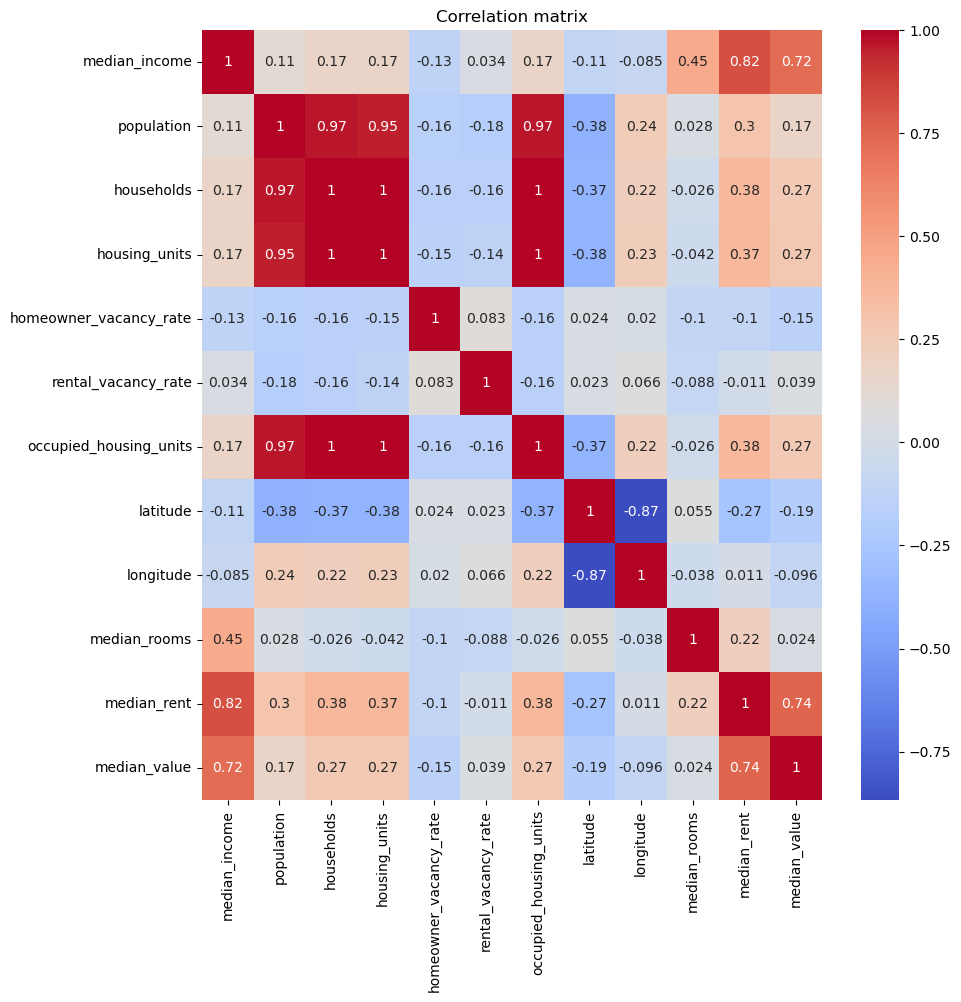

In [35]:
# correlation with median value
corr = df.corr()
corr['median_income'].sort_values(ascending=False)

# plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [36]:
df['value_to_income'] = df['median_value'] / df['median_income']
df.sort_values('value_to_income', ascending=False).head()

,median_income,population,households,housing_units,homeowner_vacancy_rate,rental_vacancy_rate,occupied_housing_units,latitude,longitude,median_rooms,median_rent,median_value,value_to_income
zipcode,,,,,,,,,,,,,
90021,15149.0,5192,1586,1725,2.8,6.1,1586,34.02909,-118.23889,1.4,961.0,1046900.0,69.106872
95936,21250.0,361,158,275,0.0,14.0,158,39.56336,-120.79279,5.5,NaN,1048100.0,49.322353
95427,24125.0,492,192,226,2.6,0.0,192,39.25326,-123.56932,4.7,NaN,859400.0,35.622798
90013,21676.0,15589,7750,9420,1.7,15.6,7750,34.04435,-118.24000,1.4,1092.0,755100.0,34.835763
90007,25226.0,40944,13374,14971,1.1,6.0,13374,34.02819,-118.28486,3.5,1396.0,789700.0,31.305003
